<font size="6">*Analysis and Predict of Resale Flat Prices with Regression*</font>

<font size="5">1. Importing libraries needed in general

In [1]:
import pandas as pd
import openpyxl as xls

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

from datetime import datetime

import seaborn as sns

<font size="5">2. Import and reading of file

In [2]:
df = pd.read_excel("RESALE.xlsx")
df.head(10)

,Full Address,Storey Range,Flat Model,Flat Type,Town,Town (group),Floor Area Sqm,Latitude,Longitude,Lease Commence Date,Year-Month Sold,Nearest Hawker,Nearest MRT,Nearest Primary School,Hawker Dist,Mrt Dist,School Dist,Resale Price
0,"45 TELOK BLANGAH DR,Singapore",10 TO 12,Improved,2 ROOM,BUKIT MERAH,Matured Estate,45.0,1.272139,103.809627,1976,2011-01-01,Blk 11 Telok Blangah Crescent,TELOK BLANGAH MRT STATION,Blangah Rise Primary School,1.157899,0.153912,0.454797,275000.0
1,"45 TELOK BLANGAH DR,Singapore",13 TO 15,Improved,2 ROOM,BUKIT MERAH,Matured Estate,54.0,1.272139,103.809627,1976,2011-01-01,Blk 11 Telok Blangah Crescent,TELOK BLANGAH MRT STATION,Blangah Rise Primary School,1.157899,0.153912,0.454797,285000.0
2,"106 BT PURMEI RD,Singapore",10 TO 12,Model A,4 ROOM,BUKIT MERAH,Matured Estate,104.0,1.273075,103.825658,1984,2011-01-01,Blk 112 Jalan Bukit Merah,HARBOURFRONT MRT STATION,Radin Mas Primary School,0.767276,0.962478,0.265618,509000.0
3,"50 TELOK BLANGAH DR,Singapore",07 TO 09,New Generation,4 ROOM,BUKIT MERAH,Matured Estate,98.0,1.273087,103.810080,1978,2011-01-01,Blk 11 Telok Blangah Crescent,TELOK BLANGAH MRT STATION,Blangah Rise Primary School,1.063867,0.260606,0.372768,526000.0
4,"108 BT PURMEI RD,Singapore",04 TO 06,Model A,4 ROOM,BUKIT MERAH,Matured Estate,104.0,1.273441,103.825477,1984,2011-01-01,Blk 112 Jalan Bukit Merah,HARBOURFRONT MRT STATION,Radin Mas Primary School,0.728191,0.988774,0.221545,540000.0
5,"110 SPOTTISWOODE PK RD,Singapore",19 TO 21,Standard,5 ROOM,BUKIT MERAH,Matured Estate,121.0,1.273668,103.836435,1979,2011-01-01,Blk 6 Tanjong Pagar Plaza,OUTRAM PARK MRT STATION,Cantonment Primary School,0.817031,0.759241,0.438143,604000.0
6,"110 BT PURMEI RD,Singapore",10 TO 12,Model A,4 ROOM,BUKIT MERAH,Matured Estate,104.0,1.273805,103.827022,1984,2011-01-01,Blk 112 Jalan Bukit Merah,HARBOURFRONT MRT STATION,Radin Mas Primary School,0.694716,1.110847,0.341224,545000.0
7,"18 CANTONMENT CL,Singapore",04 TO 06,Model A,3 ROOM,BUKIT MERAH,Matured Estate,60.0,1.273871,103.839424,2002,2011-01-01,Blk 6 Tanjong Pagar Plaza,OUTRAM PARK MRT STATION,Cantonment Primary School,0.515355,0.651901,0.189075,388000.0
8,"16 CANTONMENT CL,Singapore",04 TO 06,Model A,4 ROOM,BUKIT MERAH,Matured Estate,90.0,1.273921,103.840262,2003,2011-01-01,Blk 6 Tanjong Pagar Plaza,OUTRAM PARK MRT STATION,Cantonment Primary School,0.439607,0.650665,0.179205,575000.0
9,"28 TELOK BLANGAH RISE,Singapore",04 TO 06,Improved,3 ROOM,BUKIT MERAH,Matured Estate,59.0,1.273991,103.820927,1976,2011-01-01,Blk 11 Telok Blangah Crescent,HARBOURFRONT MRT STATION,Radin Mas Primary School,0.451687,0.943727,0.377551,290000.0


In [3]:
df.tail(10)

,Full Address,Storey Range,Flat Model,Flat Type,Town,Town (group),Floor Area Sqm,Latitude,Longitude,Lease Commence Date,Year-Month Sold,Nearest Hawker,Nearest MRT,Nearest Primary School,Hawker Dist,Mrt Dist,School Dist,Resale Price
183895,"17 DOVER CRES,Singapore",16 TO 18,Model A,4 ROOM,QUEENSTOWN,Matured Estate,92.0,1.307678,103.782914,2003,2019-12-01,Blk 20 Ghim Moh Road,DOVER MRT STATION,Fairfield Methodist School (Primary),0.692252,0.628313,0.821166,665000.0
183896,"9 HOLLAND AVE,Singapore",19 TO 21,Improved,3 ROOM,QUEENSTOWN,Matured Estate,65.0,1.307704,103.794708,1974,2019-12-01,Holland Village Market & Food Centre,BUONA VISTA MRT STATION,New Town Primary School,0.381186,0.469493,1.050703,395000.0
183897,"9 HOLLAND AVE,Singapore",10 TO 12,Improved,3 ROOM,QUEENSTOWN,Matured Estate,73.0,1.307704,103.794708,1974,2019-12-01,Holland Village Market & Food Centre,BUONA VISTA MRT STATION,New Town Primary School,0.381186,0.469493,1.050703,439988.0
183898,"3A HOLLAND CL,Singapore",07 TO 09,Model A,4 ROOM,QUEENSTOWN,Matured Estate,104.0,1.308184,103.794932,1998,2019-12-01,Holland Village Market & Food Centre,HOLLAND VILLAGE MRT STATION,New Town Primary School,0.328055,0.427720,1.082027,725000.0
183899,"11 PINE CL,Singapore",10 TO 12,Model A,4 ROOM,GEYLANG,Matured Estate,95.0,1.308213,103.882635,2000,2019-12-01,Kallang Estate Market,MOUNTBATTEN MRT STATION,Kong Hwa School,0.189269,0.222723,0.698401,740000.0
183900,"27 GHIM MOH LINK,Singapore",13 TO 15,Model A,3 ROOM,QUEENSTOWN,Matured Estate,67.0,1.308343,103.785200,2013,2019-12-01,Blk 20 Ghim Moh Road,BUONA VISTA MRT STATION,Fairfield Methodist School (Primary),0.441767,0.571306,0.835962,585000.0
183901,"27 GHIM MOH LINK,Singapore",31 TO 33,Model A,4 ROOM,QUEENSTOWN,Matured Estate,92.0,1.308343,103.785200,2013,2019-12-01,Blk 20 Ghim Moh Road,BUONA VISTA MRT STATION,Fairfield Methodist School (Primary),0.441767,0.571306,0.835962,820000.0
183902,"806 KING GEORGE'S AVE,Singapore",07 TO 09,Improved,3 ROOM,KALLANG/WHAMPOA,Matured Estate,59.0,1.308539,103.861107,1981,2019-12-01,North Bridge Road Market & Food Centre,LAVENDER MRT STATION,Stamford Primary School,0.425732,0.231312,0.642435,338000.0
183903,"671A KLANG LANE,Singapore",16 TO 18,Model A,4 ROOM,CENTRAL AREA,Matured Estate,75.0,1.308777,103.852200,2003,2019-12-01,Tekka Market,ROCHOR MRT STATION,Farrer Park Primary School,0.337507,0.358869,0.436688,483000.0
183904,"23 GHIM MOH LINK,Singapore",04 TO 06,Improved,5 ROOM,QUEENSTOWN,Matured Estate,113.0,1.308831,103.786264,2013,2019-12-01,Blk 20 Ghim Moh Road,BUONA VISTA MRT STATION,Fairfield Methodist School (Primary),0.318294,0.474679,0.890393,890000.0


<font size="5">3.Data Cleaning and Understanding

In [4]:
df.info() #Checking the dataset to know the columns, data types and whether is there any null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183905 entries, 0 to 183904
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Full Address            183905 non-null  object        
 1   Storey Range            183905 non-null  object        
 2   Flat Model              183905 non-null  object        
 3   Flat Type               183905 non-null  object        
 4   Town                    183905 non-null  object        
 5   Town (group)            183905 non-null  object        
 6   Floor Area Sqm          183905 non-null  float64       
 7   Latitude                183905 non-null  float64       
 8   Longitude               183905 non-null  float64       
 9   Lease Commence Date     183905 non-null  int64         
 10  Year-Month Sold         183905 non-null  datetime64[ns]
 11  Nearest Hawker          183905 non-null  object        
 12  Nearest MRT             183905

In [5]:
#Just to double confirm there is no null values for any of the attributes
df.isna().sum()

Full Address              0
Storey Range              0
Flat Model                0
Flat Type                 0
Town                      0
Town (group)              0
Floor Area Sqm            0
Latitude                  0
Longitude                 0
Lease Commence Date       0
Year-Month Sold           0
Nearest Hawker            0
Nearest MRT               0
Nearest Primary School    0
Hawker Dist               0
Mrt Dist                  0
School Dist               0
Resale Price              0
dtype: int64

In [6]:
#Checking if there any duplicates
duplicateRows = df[df.duplicated()]
duplicateRows
#There are 548 duplicated rows

,Full Address,Storey Range,Flat Model,Flat Type,Town,Town (group),Floor Area Sqm,Latitude,Longitude,Lease Commence Date,Year-Month Sold,Nearest Hawker,Nearest MRT,Nearest Primary School,Hawker Dist,Mrt Dist,School Dist,Resale Price
115,"7 TELOK BLANGAH CRES,Singapore",10 TO 12,Improved,1 ROOM,BUKIT MERAH,Matured Estate,31.0,1.278367,103.819407,1975,2019-03-01,Blk 11 Telok Blangah Crescent,TIONG BAHRU MRT STATION,Radin Mas Primary School,0.139571,1.211192,0.651085,172000.0
191,"257 TAMPINES ST 21,Singapore",10 TO 12,New Generation,4 ROOM,TAMPINES,Matured Estate,98.0,1.353781,103.949885,1985,2017-10-01,Market Street Food Centre,TAMPINES MRT STATION,Yumin Primary School,1.062490,0.533212,0.272833,470000.0
643,"440 TAMPINES ST 43,Singapore",10 TO 12,Simplified,4 ROOM,TAMPINES,Matured Estate,84.0,1.360799,103.951607,1986,2016-12-01,Market Street Food Centre,TAMPINES EAST MRT STATION,Tampines North Primary School,1.834614,0.608694,0.297443,380000.0
1067,"346 BT BATOK ST 34, Singapore",07 TO 09,Model A,3 ROOM,BUKIT BATOK,Non-Matured Estate,73.0,1.362490,103.750504,1986,2014-04-01,Market Street Food Centre,BUKIT GOMBAK MRT STATION,Dazhong Primary School,2.526720,0.441152,0.460275,336000.0
1300,"28 HOY FATT RD, Singapore",07 TO 09,Standard,2 ROOM,BUKIT MERAH,Matured Estate,47.0,1.286409,103.809807,1967,2014-05-01,ABC Brickworks Market & Food Centre,REDHILL MRT STATION,Gan Eng Seng Primary School,0.196265,0.855000,0.605456,280000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181695,"490A CHOA CHU KANG AVE 5,Singapore",04 TO 06,Model A,4 ROOM,CHOA CHU KANG,Non-Matured Estate,93.0,1.375223,103.741466,2016,2021-03-01,Market Street Food Centre,SOUTH VIEW LRT STATION,Chua Chu Kang Primary School,3.528995,0.706150,0.282100,440000.0
181969,"547D SEGAR RD,Singapore",07 TO 09,Model A,3 ROOM,BUKIT PANJANG,Non-Matured Estate,67.0,1.388859,103.769035,2015,2021-03-01,Bukit Timah Market,SEGAR LRT STATION,West Spring Primary School,5.501995,0.136520,0.335827,350000.0
182313,"668B EDGEFIELD PLAINS,Singapore",04 TO 06,Premium Apartment,4 ROOM,PUNGGOL,Non-Matured Estate,93.0,1.404878,103.913058,2016,2021-03-01,Market Street Food Centre,OASIS LRT STATION,Oasis Primary School,5.886547,0.289209,0.235235,470000.0
182619,"889D WOODLANDS DR 50,Singapore",07 TO 09,Model A,4 ROOM,WOODLANDS,Non-Matured Estate,93.0,1.437778,103.792512,2017,2021-03-01,Blks 20/21 Marsiling Lane,WOODLANDS MRT STATION,Woodlands Primary School,1.829651,0.542261,0.140673,475000.0


In [7]:
df = df.drop_duplicates()
df
#548 duplicated rows were removed

,Full Address,Storey Range,Flat Model,Flat Type,Town,Town (group),Floor Area Sqm,Latitude,Longitude,Lease Commence Date,Year-Month Sold,Nearest Hawker,Nearest MRT,Nearest Primary School,Hawker Dist,Mrt Dist,School Dist,Resale Price
0,"45 TELOK BLANGAH DR,Singapore",10 TO 12,Improved,2 ROOM,BUKIT MERAH,Matured Estate,45.0,1.272139,103.809627,1976,2011-01-01,Blk 11 Telok Blangah Crescent,TELOK BLANGAH MRT STATION,Blangah Rise Primary School,1.157899,0.153912,0.454797,275000.0
1,"45 TELOK BLANGAH DR,Singapore",13 TO 15,Improved,2 ROOM,BUKIT MERAH,Matured Estate,54.0,1.272139,103.809627,1976,2011-01-01,Blk 11 Telok Blangah Crescent,TELOK BLANGAH MRT STATION,Blangah Rise Primary School,1.157899,0.153912,0.454797,285000.0
2,"106 BT PURMEI RD,Singapore",10 TO 12,Model A,4 ROOM,BUKIT MERAH,Matured Estate,104.0,1.273075,103.825658,1984,2011-01-01,Blk 112 Jalan Bukit Merah,HARBOURFRONT MRT STATION,Radin Mas Primary School,0.767276,0.962478,0.265618,509000.0
3,"50 TELOK BLANGAH DR,Singapore",07 TO 09,New Generation,4 ROOM,BUKIT MERAH,Matured Estate,98.0,1.273087,103.810080,1978,2011-01-01,Blk 11 Telok Blangah Crescent,TELOK BLANGAH MRT STATION,Blangah Rise Primary School,1.063867,0.260606,0.372768,526000.0
4,"108 BT PURMEI RD,Singapore",04 TO 06,Model A,4 ROOM,BUKIT MERAH,Matured Estate,104.0,1.273441,103.825477,1984,2011-01-01,Blk 112 Jalan Bukit Merah,HARBOURFRONT MRT STATION,Radin Mas Primary School,0.728191,0.988774,0.221545,540000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183900,"27 GHIM MOH LINK,Singapore",13 TO 15,Model A,3 ROOM,QUEENSTOWN,Matured Estate,67.0,1.308343,103.785200,2013,2019-12-01,Blk 20 Ghim Moh Road,BUONA VISTA MRT STATION,Fairfield Methodist School (Primary),0.441767,0.571306,0.835962,585000.0
183901,"27 GHIM MOH LINK,Singapore",31 TO 33,Model A,4 ROOM,QUEENSTOWN,Matured Estate,92.0,1.308343,103.785200,2013,2019-12-01,Blk 20 Ghim Moh Road,BUONA VISTA MRT STATION,Fairfield Methodist School (Primary),0.441767,0.571306,0.835962,820000.0
183902,"806 KING GEORGE'S AVE,Singapore",07 TO 09,Improved,3 ROOM,KALLANG/WHAMPOA,Matured Estate,59.0,1.308539,103.861107,1981,2019-12-01,North Bridge Road Market & Food Centre,LAVENDER MRT STATION,Stamford Primary School,0.425732,0.231312,0.642435,338000.0
183903,"671A KLANG LANE,Singapore",16 TO 18,Model A,4 ROOM,CENTRAL AREA,Matured Estate,75.0,1.308777,103.852200,2003,2019-12-01,Tekka Market,ROCHOR MRT STATION,Farrer Park Primary School,0.337507,0.358869,0.436688,483000.0


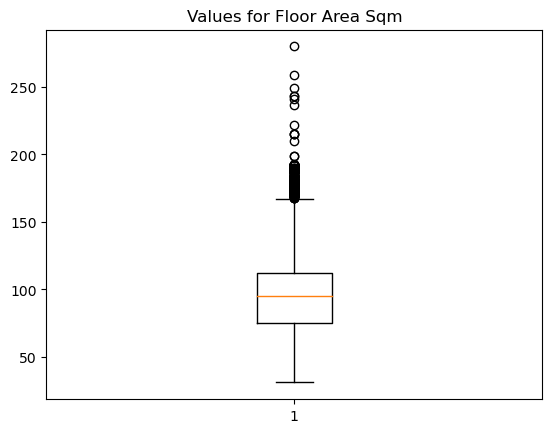

<Figure size 1000x700 with 0 Axes>

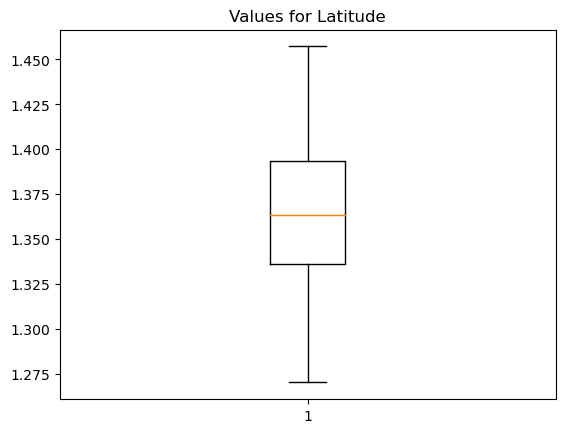

<Figure size 1000x700 with 0 Axes>

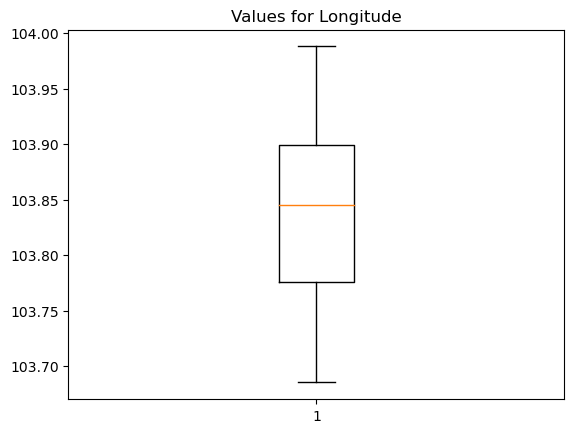

<Figure size 1000x700 with 0 Axes>

In [8]:
#Checking the values for numerical attributes to ensure there no illogical data

Floor_Area = df["Floor Area Sqm"]
plt.boxplot(Floor_Area)
plt.title("Values for Floor Area Sqm")
fig = plt.figure(figsize =(10, 7))
plt.show()
#Although there is outliers based on box-and-whisker plot, those values are not impossible to have

Lat = df["Latitude"]
plt.boxplot(Lat)
plt.title("Values for Latitude")
fig = plt.figure(figsize =(10, 7))
plt.show()
#Values for latitude looks to be okay

Long = df["Longitude"]
plt.boxplot(Long)
plt.title("Values for Longitude")
fig = plt.figure(figsize =(10, 7))
plt.show()
#Values for longitude looks to be okay

print("\n")

<font size="5">4. Data Processing</font>

In the codes below, all the steps are taken to achieve data information generation with the features I would like to include in my modelling, with their formats being standardized

<font size="4">4a. Data Manipulation</font>
<br>
In the steps below, I would like to obtain the specific storey of the storey range instead

In [9]:
storey_to_from = df['Storey Range'].str.split('TO')
storey_to_from.head()
#split them into 2 parts of the number between the seperator of "TO"

0    [10 ,  12]
1    [13 ,  15]
2    [10 ,  12]
3    [07 ,  09]
4    [04 ,  06]
Name: Storey Range, dtype: object

In [10]:
storey_to_from = df['Storey Range'].str.split('TO',expand=True)
storey_to_from.head()
#But even after split, they are still string

,0,1
0,10,12
1,13,15
2,10,12
3,07,09
4,04,06


In [11]:
storey_to_from.columns=["storey_from","storey_to"]
storey_to_from.head()

,storey_from,storey_to
0,10,12
1,13,15
2,10,12
3,07,09
4,04,06


In [12]:
storey_to_from["storey_from"] = pd.to_numeric(storey_to_from['storey_from'])
storey_to_from.describe()

,storey_from
count,183356.000000
mean,7.306518
std,5.531704
min,1.000000
25%,4.000000
50%,7.000000
75%,10.000000
max,49.000000


In [13]:
storey_to_from

,storey_from,storey_to
0,10.0,12
1,13.0,15
2,10.0,12
3,7.0,09
4,4.0,06
...,...,...
183900,13.0,15
183901,31.0,33
183902,7.0,09
183903,16.0,18


In [14]:
storey_to_from["storey_to"] = pd.to_numeric(storey_to_from['storey_to'])
storey_to_from
#And now, all have been changed to numeric

,storey_from,storey_to
0,10.0,12.0
1,13.0,15.0
2,10.0,12.0
3,7.0,9.0
4,4.0,6.0
...,...,...
183900,13.0,15.0
183901,31.0,33.0
183902,7.0,9.0
183903,16.0,18.0


In [15]:
storey_to_from['storey_mean'] = storey_to_from.mean(axis=1)
storey_to_from.head()

,storey_from,storey_to,storey_mean
0,10.0,12.0,11.0
1,13.0,15.0,14.0
2,10.0,12.0,11.0
3,7.0,9.0,8.0
4,4.0,6.0,5.0


In [16]:
#Now needs to merge them together
df_merged = pd.concat([df,storey_to_from],axis=1)
df_merged
#numerical storey_from and storey_to added back to the table, at the back

,Full Address,Storey Range,Flat Model,Flat Type,Town,Town (group),Floor Area Sqm,Latitude,Longitude,Lease Commence Date,...,Nearest Hawker,Nearest MRT,Nearest Primary School,Hawker Dist,Mrt Dist,School Dist,Resale Price,storey_from,storey_to,storey_mean
0,"45 TELOK BLANGAH DR,Singapore",10 TO 12,Improved,2 ROOM,BUKIT MERAH,Matured Estate,45.0,1.272139,103.809627,1976,...,Blk 11 Telok Blangah Crescent,TELOK BLANGAH MRT STATION,Blangah Rise Primary School,1.157899,0.153912,0.454797,275000.0,10.0,12.0,11.0
1,"45 TELOK BLANGAH DR,Singapore",13 TO 15,Improved,2 ROOM,BUKIT MERAH,Matured Estate,54.0,1.272139,103.809627,1976,...,Blk 11 Telok Blangah Crescent,TELOK BLANGAH MRT STATION,Blangah Rise Primary School,1.157899,0.153912,0.454797,285000.0,13.0,15.0,14.0
2,"106 BT PURMEI RD,Singapore",10 TO 12,Model A,4 ROOM,BUKIT MERAH,Matured Estate,104.0,1.273075,103.825658,1984,...,Blk 112 Jalan Bukit Merah,HARBOURFRONT MRT STATION,Radin Mas Primary School,0.767276,0.962478,0.265618,509000.0,10.0,12.0,11.0
3,"50 TELOK BLANGAH DR,Singapore",07 TO 09,New Generation,4 ROOM,BUKIT MERAH,Matured Estate,98.0,1.273087,103.810080,1978,...,Blk 11 Telok Blangah Crescent,TELOK BLANGAH MRT STATION,Blangah Rise Primary School,1.063867,0.260606,0.372768,526000.0,7.0,9.0,8.0
4,"108 BT PURMEI RD,Singapore",04 TO 06,Model A,4 ROOM,BUKIT MERAH,Matured Estate,104.0,1.273441,103.825477,1984,...,Blk 112 Jalan Bukit Merah,HARBOURFRONT MRT STATION,Radin Mas Primary School,0.728191,0.988774,0.221545,540000.0,4.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183900,"27 GHIM MOH LINK,Singapore",13 TO 15,Model A,3 ROOM,QUEENSTOWN,Matured Estate,67.0,1.308343,103.785200,2013,...,Blk 20 Ghim Moh Road,BUONA VISTA MRT STATION,Fairfield Methodist School (Primary),0.441767,0.571306,0.835962,585000.0,13.0,15.0,14.0
183901,"27 GHIM MOH LINK,Singapore",31 TO 33,Model A,4 ROOM,QUEENSTOWN,Matured Estate,92.0,1.308343,103.785200,2013,...,Blk 20 Ghim Moh Road,BUONA VISTA MRT STATION,Fairfield Methodist School (Primary),0.441767,0.571306,0.835962,820000.0,31.0,33.0,32.0
183902,"806 KING GEORGE'S AVE,Singapore",07 TO 09,Improved,3 ROOM,KALLANG/WHAMPOA,Matured Estate,59.0,1.308539,103.861107,1981,...,North Bridge Road Market & Food Centre,LAVENDER MRT STATION,Stamford Primary School,0.425732,0.231312,0.642435,338000.0,7.0,9.0,8.0
183903,"671A KLANG LANE,Singapore",16 TO 18,Model A,4 ROOM,CENTRAL AREA,Matured Estate,75.0,1.308777,103.852200,2003,...,Tekka Market,ROCHOR MRT STATION,Farrer Park Primary School,0.337507,0.358869,0.436688,483000.0,16.0,18.0,17.0


In [17]:
#Ensuring that the data has no Na after doing the conversion
df_merged.isna().sum()

Full Address              0
Storey Range              0
Flat Model                0
Flat Type                 0
Town                      0
Town (group)              0
Floor Area Sqm            0
Latitude                  0
Longitude                 0
Lease Commence Date       0
Year-Month Sold           0
Nearest Hawker            0
Nearest MRT               0
Nearest Primary School    0
Hawker Dist               0
Mrt Dist                  0
School Dist               0
Resale Price              0
storey_from               1
storey_to                 1
storey_mean               1
dtype: int64

In [18]:
#There is a row of data with Na after the conversion and so will be removed
df_merged = df_merged.dropna()

In [19]:
df_merged.isna().sum()

Full Address              0
Storey Range              0
Flat Model                0
Flat Type                 0
Town                      0
Town (group)              0
Floor Area Sqm            0
Latitude                  0
Longitude                 0
Lease Commence Date       0
Year-Month Sold           0
Nearest Hawker            0
Nearest MRT               0
Nearest Primary School    0
Hawker Dist               0
Mrt Dist                  0
School Dist               0
Resale Price              0
storey_from               0
storey_to                 0
storey_mean               0
dtype: int64

In [20]:
#df_merged contains all the columns together with the added storey mean. Now I would remove all the columns I deemed not needed
revised_df = df_merged.drop(['Full Address', 'Storey Range', 'Latitude', 'Longitude','Nearest Hawker','Nearest MRT', 'Nearest Primary School','storey_from','storey_to'], axis = 1)
revised_df

,Flat Model,Flat Type,Town,Town (group),Floor Area Sqm,Lease Commence Date,Year-Month Sold,Hawker Dist,Mrt Dist,School Dist,Resale Price,storey_mean
0,Improved,2 ROOM,BUKIT MERAH,Matured Estate,45.0,1976,2011-01-01,1.157899,0.153912,0.454797,275000.0,11.0
1,Improved,2 ROOM,BUKIT MERAH,Matured Estate,54.0,1976,2011-01-01,1.157899,0.153912,0.454797,285000.0,14.0
2,Model A,4 ROOM,BUKIT MERAH,Matured Estate,104.0,1984,2011-01-01,0.767276,0.962478,0.265618,509000.0,11.0
3,New Generation,4 ROOM,BUKIT MERAH,Matured Estate,98.0,1978,2011-01-01,1.063867,0.260606,0.372768,526000.0,8.0
4,Model A,4 ROOM,BUKIT MERAH,Matured Estate,104.0,1984,2011-01-01,0.728191,0.988774,0.221545,540000.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
183900,Model A,3 ROOM,QUEENSTOWN,Matured Estate,67.0,2013,2019-12-01,0.441767,0.571306,0.835962,585000.0,14.0
183901,Model A,4 ROOM,QUEENSTOWN,Matured Estate,92.0,2013,2019-12-01,0.441767,0.571306,0.835962,820000.0,32.0
183902,Improved,3 ROOM,KALLANG/WHAMPOA,Matured Estate,59.0,1981,2019-12-01,0.425732,0.231312,0.642435,338000.0,8.0
183903,Model A,4 ROOM,CENTRAL AREA,Matured Estate,75.0,2003,2019-12-01,0.337507,0.358869,0.436688,483000.0,17.0


<font size="4">4b. Data Conversion</font>
<br>
In the steps below, using the Lease commence date and Year-Month sold, I would like to extract the duration since the the flat is sold and leased, respectively. This would be a better insight that can be used in modelling. The Lease commence date and Year-Month sold columns will then be removed

In [21]:
revised_df['Year-Month Sold'] = pd.to_datetime(revised_df['Year-Month Sold'])
today = datetime.today()
revised_df['Months Since Sold'] = (today.year - revised_df['Year-Month Sold'].dt.year) * 12 + (today.month - revised_df['Year-Month Sold'].dt.month)

In [22]:
current_year = datetime.now().year
revised_df["Years Since Leased"] = current_year - revised_df["Lease Commence Date"]
revised_df

,Flat Model,Flat Type,Town,Town (group),Floor Area Sqm,Lease Commence Date,Year-Month Sold,Hawker Dist,Mrt Dist,School Dist,Resale Price,storey_mean,Months Since Sold,Years Since Leased
0,Improved,2 ROOM,BUKIT MERAH,Matured Estate,45.0,1976,2011-01-01,1.157899,0.153912,0.454797,275000.0,11.0,157,48
1,Improved,2 ROOM,BUKIT MERAH,Matured Estate,54.0,1976,2011-01-01,1.157899,0.153912,0.454797,285000.0,14.0,157,48
2,Model A,4 ROOM,BUKIT MERAH,Matured Estate,104.0,1984,2011-01-01,0.767276,0.962478,0.265618,509000.0,11.0,157,40
3,New Generation,4 ROOM,BUKIT MERAH,Matured Estate,98.0,1978,2011-01-01,1.063867,0.260606,0.372768,526000.0,8.0,157,46
4,Model A,4 ROOM,BUKIT MERAH,Matured Estate,104.0,1984,2011-01-01,0.728191,0.988774,0.221545,540000.0,5.0,157,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183900,Model A,3 ROOM,QUEENSTOWN,Matured Estate,67.0,2013,2019-12-01,0.441767,0.571306,0.835962,585000.0,14.0,50,11
183901,Model A,4 ROOM,QUEENSTOWN,Matured Estate,92.0,2013,2019-12-01,0.441767,0.571306,0.835962,820000.0,32.0,50,11
183902,Improved,3 ROOM,KALLANG/WHAMPOA,Matured Estate,59.0,1981,2019-12-01,0.425732,0.231312,0.642435,338000.0,8.0,50,43
183903,Model A,4 ROOM,CENTRAL AREA,Matured Estate,75.0,2003,2019-12-01,0.337507,0.358869,0.436688,483000.0,17.0,50,21


In [23]:
revised_df = revised_df.drop(["Lease Commence Date", "Year-Month Sold"], axis = 1)
revised_df

,Flat Model,Flat Type,Town,Town (group),Floor Area Sqm,Hawker Dist,Mrt Dist,School Dist,Resale Price,storey_mean,Months Since Sold,Years Since Leased
0,Improved,2 ROOM,BUKIT MERAH,Matured Estate,45.0,1.157899,0.153912,0.454797,275000.0,11.0,157,48
1,Improved,2 ROOM,BUKIT MERAH,Matured Estate,54.0,1.157899,0.153912,0.454797,285000.0,14.0,157,48
2,Model A,4 ROOM,BUKIT MERAH,Matured Estate,104.0,0.767276,0.962478,0.265618,509000.0,11.0,157,40
3,New Generation,4 ROOM,BUKIT MERAH,Matured Estate,98.0,1.063867,0.260606,0.372768,526000.0,8.0,157,46
4,Model A,4 ROOM,BUKIT MERAH,Matured Estate,104.0,0.728191,0.988774,0.221545,540000.0,5.0,157,40
...,...,...,...,...,...,...,...,...,...,...,...,...
183900,Model A,3 ROOM,QUEENSTOWN,Matured Estate,67.0,0.441767,0.571306,0.835962,585000.0,14.0,50,11
183901,Model A,4 ROOM,QUEENSTOWN,Matured Estate,92.0,0.441767,0.571306,0.835962,820000.0,32.0,50,11
183902,Improved,3 ROOM,KALLANG/WHAMPOA,Matured Estate,59.0,0.425732,0.231312,0.642435,338000.0,8.0,50,43
183903,Model A,4 ROOM,CENTRAL AREA,Matured Estate,75.0,0.337507,0.358869,0.436688,483000.0,17.0,50,21


<font size="4">4c. Data Standardisation</font>
<br>
Standardize the number of decimal points for the numerical data

In [24]:
for column in revised_df.columns:
    if pd.api.types.is_numeric_dtype(revised_df[column]):
        # Standardize and round numerical values to 3 decimal points
        revised_df[column] = revised_df[column].round(3)
        
revised_df

,Flat Model,Flat Type,Town,Town (group),Floor Area Sqm,Hawker Dist,Mrt Dist,School Dist,Resale Price,storey_mean,Months Since Sold,Years Since Leased
0,Improved,2 ROOM,BUKIT MERAH,Matured Estate,45.0,1.158,0.154,0.455,275000.0,11.0,157,48
1,Improved,2 ROOM,BUKIT MERAH,Matured Estate,54.0,1.158,0.154,0.455,285000.0,14.0,157,48
2,Model A,4 ROOM,BUKIT MERAH,Matured Estate,104.0,0.767,0.962,0.266,509000.0,11.0,157,40
3,New Generation,4 ROOM,BUKIT MERAH,Matured Estate,98.0,1.064,0.261,0.373,526000.0,8.0,157,46
4,Model A,4 ROOM,BUKIT MERAH,Matured Estate,104.0,0.728,0.989,0.222,540000.0,5.0,157,40
...,...,...,...,...,...,...,...,...,...,...,...,...
183900,Model A,3 ROOM,QUEENSTOWN,Matured Estate,67.0,0.442,0.571,0.836,585000.0,14.0,50,11
183901,Model A,4 ROOM,QUEENSTOWN,Matured Estate,92.0,0.442,0.571,0.836,820000.0,32.0,50,11
183902,Improved,3 ROOM,KALLANG/WHAMPOA,Matured Estate,59.0,0.426,0.231,0.642,338000.0,8.0,50,43
183903,Model A,4 ROOM,CENTRAL AREA,Matured Estate,75.0,0.338,0.359,0.437,483000.0,17.0,50,21


In [25]:
#Renaming the data columns for clearer understanding
new_column_names = {"Town (group)": "Estate Type",
                    "Floor Area Sqm": "Floor Area (sqm)",
                   "Hawker Dist": "Hawker Dist (km)",
                   "Mrt Dist": "MRT Dist (km)",
                   "School Dist": "School Dist (km)",
                   "Resale Price": "Resale_Price"}

final_data = revised_df.rename(columns=new_column_names)

final_data

,Flat Model,Flat Type,Town,Estate Type,Floor Area (sqm),Hawker Dist (km),MRT Dist (km),School Dist (km),Resale_Price,storey_mean,Months Since Sold,Years Since Leased
0,Improved,2 ROOM,BUKIT MERAH,Matured Estate,45.0,1.158,0.154,0.455,275000.0,11.0,157,48
1,Improved,2 ROOM,BUKIT MERAH,Matured Estate,54.0,1.158,0.154,0.455,285000.0,14.0,157,48
2,Model A,4 ROOM,BUKIT MERAH,Matured Estate,104.0,0.767,0.962,0.266,509000.0,11.0,157,40
3,New Generation,4 ROOM,BUKIT MERAH,Matured Estate,98.0,1.064,0.261,0.373,526000.0,8.0,157,46
4,Model A,4 ROOM,BUKIT MERAH,Matured Estate,104.0,0.728,0.989,0.222,540000.0,5.0,157,40
...,...,...,...,...,...,...,...,...,...,...,...,...
183900,Model A,3 ROOM,QUEENSTOWN,Matured Estate,67.0,0.442,0.571,0.836,585000.0,14.0,50,11
183901,Model A,4 ROOM,QUEENSTOWN,Matured Estate,92.0,0.442,0.571,0.836,820000.0,32.0,50,11
183902,Improved,3 ROOM,KALLANG/WHAMPOA,Matured Estate,59.0,0.426,0.231,0.642,338000.0,8.0,50,43
183903,Model A,4 ROOM,CENTRAL AREA,Matured Estate,75.0,0.338,0.359,0.437,483000.0,17.0,50,21


<font size="5">5. Exploratory Data Analysis (EDA)</font>
<br>
<br>
To understand how does the different features relate to the resale price and the different in the price between different towns
<br>
<br>
<font size="4">5a. Data correlation to the resale price</font>

In [26]:
final_data.corr()

,Floor Area (sqm),Hawker Dist (km),MRT Dist (km),School Dist (km),Resale_Price,storey_mean,Months Since Sold,Years Since Leased
Floor Area (sqm),1.000000,0.265691,0.017707,-0.104009,0.648723,0.022877,-0.021301,-0.274884
Hawker Dist (km),0.265691,1.000000,-0.273874,-0.258802,-0.020754,0.040213,-0.080035,-0.571071
MRT Dist (km),0.017707,-0.273874,1.000000,0.203745,-0.121303,-0.082411,0.025914,0.192475
School Dist (km),-0.104009,-0.258802,0.203745,1.000000,-0.003530,0.016999,-0.006793,0.178502
Resale_Price,0.648723,-0.020754,-0.121303,-0.003530,1.000000,0.362726,-0.064765,-0.360713
storey_mean,0.022877,0.040213,-0.082411,0.016999,0.362726,1.000000,-0.080525,-0.264808
Months Since Sold,-0.021301,-0.080035,0.025914,-0.006793,-0.064765,-0.080525,1.000000,0.205151
Years Since Leased,-0.274884,-0.571071,0.192475,0.178502,-0.360713,-0.264808,0.205151,1.000000


<Axes: >

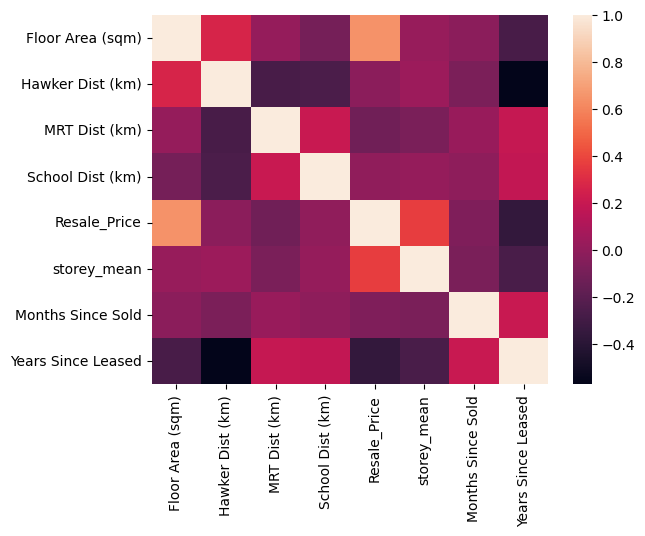

In [27]:
sns.heatmap(final_data.corr())

In [28]:
resale_price = "Resale_Price"
correlations = (final_data.corr()[resale_price].sort_values(ascending=False))
correlations

Resale_Price          1.000000
Floor Area (sqm)      0.648723
storey_mean           0.362726
School Dist (km)     -0.003530
Hawker Dist (km)     -0.020754
Months Since Sold    -0.064765
MRT Dist (km)        -0.121303
Years Since Leased   -0.360713
Name: Resale_Price, dtype: float64

It can be seen that the floor area understandably correlates the most to the resale price, followed by storey of the flat, in terms of magnitude.
<br>
However, this does not mean that the negative correlation do not correlate to the resale price. It just means they are inversely correlated to the resale price, indicating that, for example, the shorter the years since leased or the shorter the distance hawker centre, the higher the resale price.

<font size="4">5b. Further analysis and visualisation</font>
<br> <br>
For instance, if I were to find out how many are there for each town and for each flat type in my data

In [29]:
value_counts_town = final_data['Town'].value_counts()

print("Number of occurrences for each town:")
print(value_counts_town)

Number of occurrences for each town:
JURONG WEST        13818
WOODLANDS          13701
SENGKANG           13588
TAMPINES           12774
YISHUN             12104
BEDOK              10882
PUNGGOL             9728
HOUGANG             9195
ANG MO KIO          8500
CHOA CHU KANG       7691
BUKIT MERAH         7144
BUKIT PANJANG       7028
BUKIT BATOK         6839
TOA PAYOH           5928
PASIR RIS           5810
KALLANG/WHAMPOA     5288
QUEENSTOWN          5068
GEYLANG             4836
SEMBAWANG           4525
CLEMENTI            4295
JURONG EAST         4077
SERANGOON           3820
BISHAN              3526
CENTRAL AREA        1566
MARINE PARADE       1181
BUKIT TIMAH          444
Name: Town, dtype: int64


In [30]:
value_counts_flattype = final_data['Flat Type'].value_counts()

print("Number of occurrences for each flat type:")
print(value_counts_flattype)

Number of occurrences for each flat type:
4 ROOM              74274
3 ROOM              47394
5 ROOM              44774
EXECUTIVE           14381
2 ROOM               2360
1 ROOM                101
MULTI-GENERATION       72
Name: Flat Type, dtype: int64


For instance, if I were to find out the number of 5 room flat are there in sengkang

In [31]:
sengkang_5rm = final_data[(final_data['Town'] == 'SENGKANG') & (final_data['Flat Type'] == '5 ROOM')].shape[0]

print("Number of 5 room flats in Sengkang:", sengkang_5rm)


Number of 5 room flats in Sengkang: 4886


For instance, if I were to compare and visualize the median price of 5 room flats in different town of interest specifically

In [32]:
sengkang5rm_price = final_data[(final_data['Town'] == 'SENGKANG') & (final_data['Flat Type'] == '5 ROOM')]['Resale_Price'].median()
sengkang5rm_price

woodlands5rm_price = final_data[(final_data['Town'] == 'WOODLANDS') & (final_data['Flat Type'] == '5 ROOM')]['Resale_Price'].median()
woodlands5rm_price

jurongwest5rm_price = final_data[(final_data['Town'] == 'JURONG WEST') & (final_data['Flat Type'] == '5 ROOM')]['Resale_Price'].median()
jurongwest5rm_price

tampines5rm_price = final_data[(final_data['Town'] == 'TAMPINES') & (final_data['Flat Type'] == '5 ROOM')]['Resale_Price'].median()
tampines5rm_price

yishun5rm_price = final_data[(final_data['Town'] == 'YISHUN') & (final_data['Flat Type'] == '5 ROOM')]['Resale_Price'].median()
yishun5rm_price

print("Median price of 5 room flat in Sengkang:", sengkang5rm_price)
print("Median price of 5 room flat in Woodlands:", woodlands5rm_price)
print("Median price of 5 room flat in Jurong West:", jurongwest5rm_price)
print("Median price of 5 room flat in Tampines:", tampines5rm_price)
print("Median price of 5 room flat in Yishun:", yishun5rm_price)

Median price of 5 room flat in Sengkang: 468888.0
Median price of 5 room flat in Woodlands: 422000.0
Median price of 5 room flat in Jurong West: 457750.0
Median price of 5 room flat in Tampines: 530000.0
Median price of 5 room flat in Yishun: 470000.0


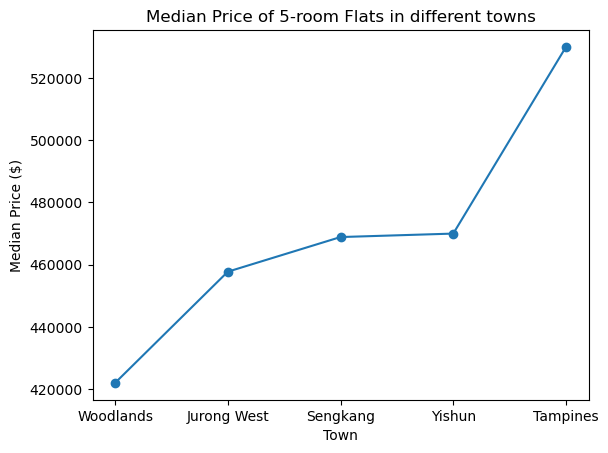

In [33]:
# Create a dictionary to store the data
data = {'Sengkang': sengkang5rm_price, 'Woodlands': woodlands5rm_price, 'Jurong West': jurongwest5rm_price,
       'Tampines': tampines5rm_price, 'Yishun':yishun5rm_price}

# Sort the data by median price in ascending order
sorted_data = sorted(data.items(), key=lambda x: x[1])

# Extracting towns and median prices from sorted data
towns = [town for town, _ in sorted_data]
median_prices = [price for _, price in sorted_data]

# Plotting the data
plt.plot(towns, median_prices, marker='o', linestyle='-')
plt.title('Median Price of 5-room Flats in different towns')
plt.xlabel('Town')
plt.ylabel('Median Price ($)')
plt.show()


Another instance could be to analyze the same type of flat types to understand their difference in median flat prices across all the different towns

In [34]:
median_prices_by_town = final_data[final_data['Flat Type'] == '5 ROOM'].groupby('Town')['Resale_Price'].median()

# Sorting the median prices in ascending order
median_prices_by_town_sorted = median_prices_by_town.sort_values()

print("Median price of 5-room flats sorted by town:")
print(median_prices_by_town_sorted)


Median price of 5-room flats sorted by town:
Town
SEMBAWANG          420000.0
WOODLANDS          422000.0
CHOA CHU KANG      429000.0
JURONG WEST        457750.0
SENGKANG           468888.0
YISHUN             470000.0
BUKIT PANJANG      474194.0
PUNGGOL            475000.0
PASIR RIS          485000.0
HOUGANG            500000.0
JURONG EAST        525000.0
SERANGOON          530000.0
TAMPINES           530000.0
BUKIT BATOK        539000.0
BEDOK              570000.0
ANG MO KIO         648000.0
GEYLANG            650000.0
KALLANG/WHAMPOA    688000.0
CLEMENTI           690000.0
BISHAN             725000.0
TOA PAYOH          749500.0
BUKIT MERAH        755000.0
MARINE PARADE      800000.0
BUKIT TIMAH        820000.0
QUEENSTOWN         830000.0
CENTRAL AREA       973888.0
Name: Resale_Price, dtype: float64


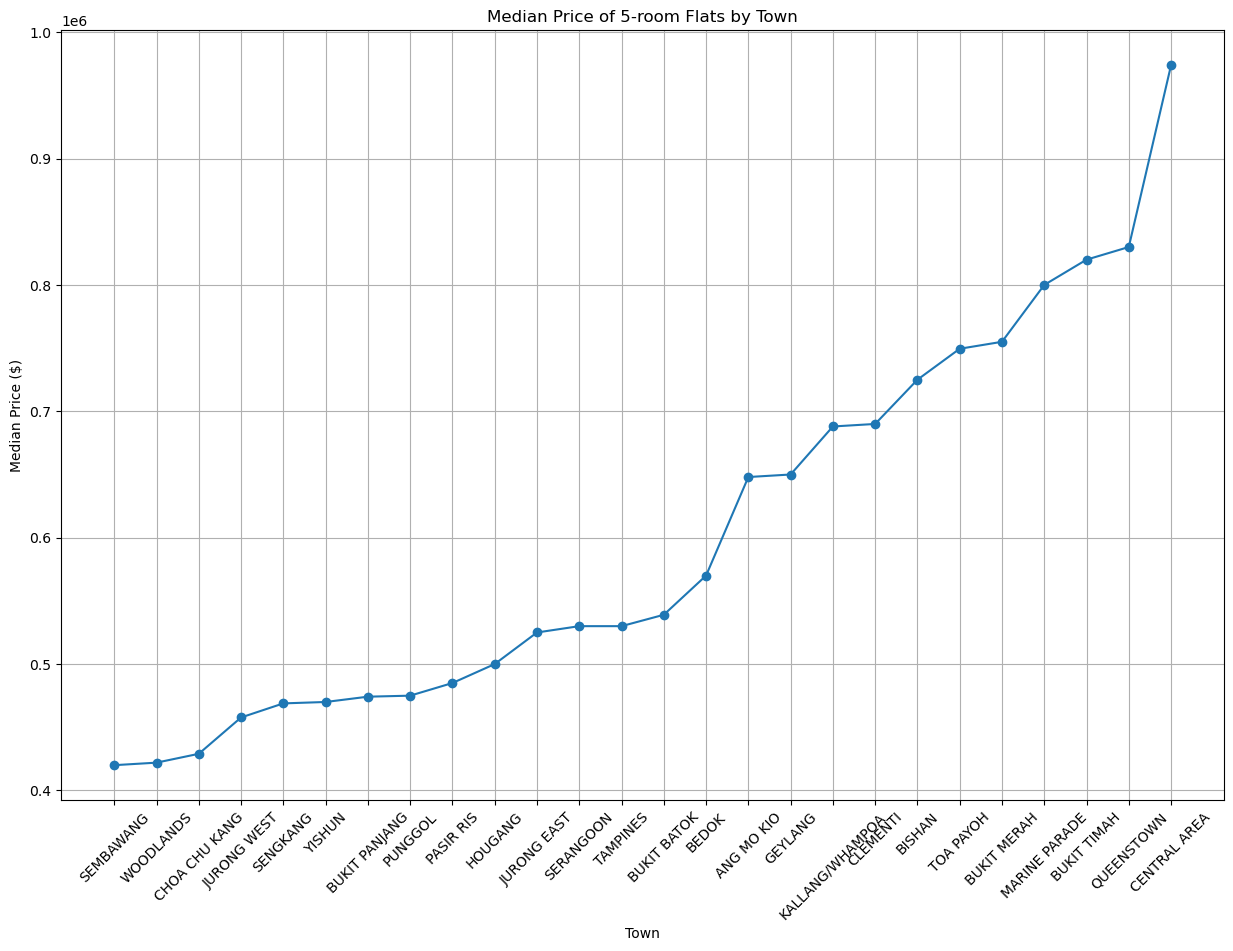

In [36]:
towns = median_prices_by_town_sorted.index.tolist()
median_prices = median_prices_by_town_sorted.tolist()

plt.figure(figsize=(15,10))
plt.plot(towns, median_prices, marker='o', linestyle='-')
plt.title('Median Price of 5-room Flats by Town')
plt.xlabel('Town')
plt.ylabel('Median Price ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.savefig("Median Price Plot")
plt.show()

<font size="5">5. Preparing the data for regression modelling</font>

In [37]:
#To find out the data types
final_data.dtypes

Flat Model             object
Flat Type              object
Town                   object
Estate Type            object
Floor Area (sqm)      float64
Hawker Dist (km)      float64
MRT Dist (km)         float64
School Dist (km)      float64
Resale_Price          float64
storey_mean           float64
Months Since Sold       int64
Years Since Leased      int64
dtype: object

In [38]:
#to label encode the categorical data and display out what does the different number represent of which categorical data
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Initialize an empty list to store the mappings
mappings = []

# Iterate over each categorical column and replace it with its encoded version
for col in final_data.select_dtypes(include=['object']).columns:
    print("Column:", col)
    print("Original Unique Values:", final_data[col].unique())  # Print original unique values
    encoded_labels = label_encoder.fit_transform(final_data[col])  # Encode labels
    final_data[col] = encoded_labels  # Replace original column with encoded labels
    mappings.append({'column': col, 'original_labels': final_data[col].unique(), 'encoded_labels': encoded_labels})

# Print out the mappings
for mapping in mappings:
    print(f"\nColumn: {mapping['column']}")
    print("Original Labels:", mapping['original_labels'])

Column: Flat Model
Original Unique Values: ['Improved' 'Model A' 'New Generation' 'Standard' '2-room'
 'Premium Apartment' 'Simplified' 'DBSS' 'Maisonette' 'Model A2'
 'Adjoined flat' 'Apartment' 'Terrace' 'Model A-Maisonette'
 'Improved-Maisonette' 'Type S1' 'Premium Apartment Loft' 'Type S2'
 'Premium Maisonette' 'Multi Generation']
Column: Flat Type
Original Unique Values: ['2 ROOM' '4 ROOM' '5 ROOM' '3 ROOM' '1 ROOM' 'EXECUTIVE'
 'MULTI-GENERATION']
Column: Town
Original Unique Values: ['BUKIT MERAH' 'CENTRAL AREA' 'PASIR RIS' 'JURONG EAST' 'SEMBAWANG'
 'BUKIT PANJANG' 'SENGKANG' 'YISHUN' 'WOODLANDS' 'BUKIT BATOK' 'TAMPINES'
 'CHOA CHU KANG' 'HOUGANG' 'PUNGGOL' 'BEDOK' 'QUEENSTOWN'
 'KALLANG/WHAMPOA' 'JURONG WEST' 'BUKIT TIMAH' 'MARINE PARADE' 'CLEMENTI'
 'GEYLANG' 'SERANGOON' 'ANG MO KIO' 'TOA PAYOH' 'BISHAN']
Column: Estate Type
Original Unique Values: ['Matured Estate' 'Non-Matured Estate']

Column: Flat Model
Original Labels: [ 4  7 11 16  0 12 15  3  6  9  1  2 17  8  5 18 13 

The different categorical are represented by the different encoded value as shown above and can be referred to if needed for modelling result analysis. For example, <br>2 room flat is encoded into 1<br>1 room flat is encoded into 5<br>Executive flat is encoded into 6<br>Non-Matured Estate is encoded into 1<br>The table below is also as shown

In [39]:
#final encoded data
final_data

,Flat Model,Flat Type,Town,Estate Type,Floor Area (sqm),Hawker Dist (km),MRT Dist (km),School Dist (km),Resale_Price,storey_mean,Months Since Sold,Years Since Leased
0,4,1,4,0,45.0,1.158,0.154,0.455,275000.0,11.0,157,48
1,4,1,4,0,54.0,1.158,0.154,0.455,285000.0,14.0,157,48
2,7,3,4,0,104.0,0.767,0.962,0.266,509000.0,11.0,157,40
3,11,3,4,0,98.0,1.064,0.261,0.373,526000.0,8.0,157,46
4,7,3,4,0,104.0,0.728,0.989,0.222,540000.0,5.0,157,40
...,...,...,...,...,...,...,...,...,...,...,...,...
183900,7,2,18,0,67.0,0.442,0.571,0.836,585000.0,14.0,50,11
183901,7,3,18,0,92.0,0.442,0.571,0.836,820000.0,32.0,50,11
183902,4,2,14,0,59.0,0.426,0.231,0.642,338000.0,8.0,50,43
183903,7,3,7,0,75.0,0.338,0.359,0.437,483000.0,17.0,50,21


Split the data into X and y which is the target variable, as well as into train/test data

In [40]:
columns_to_include = list(range(8)) + list(range(9, 12))
X = final_data.iloc[:, columns_to_include]
y = final_data.Resale_Price

In [41]:
X.head()

,Flat Model,Flat Type,Town,Estate Type,Floor Area (sqm),Hawker Dist (km),MRT Dist (km),School Dist (km),storey_mean,Months Since Sold,Years Since Leased
0,4,1,4,0,45.0,1.158,0.154,0.455,11.0,157,48
1,4,1,4,0,54.0,1.158,0.154,0.455,14.0,157,48
2,7,3,4,0,104.0,0.767,0.962,0.266,11.0,157,40
3,11,3,4,0,98.0,1.064,0.261,0.373,8.0,157,46
4,7,3,4,0,104.0,0.728,0.989,0.222,5.0,157,40


In [42]:
y.head()

0    275000.0
1    285000.0
2    509000.0
3    526000.0
4    540000.0
Name: Resale_Price, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split

# Step 4: Dividing the dataset into test and train data
X_train, X_test, y_train, y_test = train_test_split(
                X, y, 
                test_size=0.3, 
                random_state=10, 
                shuffle=True
                )
    
print("Total rows of data is ",len(X))
print("Rows of the train data is ",len(X_train))
print("Rows of the test data is ",len(X_test))

Total rows of data is  183356
Rows of the train data is  128349
Rows of the test data is  55007


<font size="5">6. Import and training the regression model</font>

In [44]:
from sklearn.linear_model import LinearRegression

# Step 5: Selecting the linear regression method from scikit-learn library
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<font size="5">7. Model Evaluation</font>

In [45]:
from sklearn import metrics
from sklearn.metrics import r2_score


# Step 6: Validation
# Evaluating the trained model on training data
y_prediction = model.predict(X_train)
print("Mean Absolute Error on train data = " , metrics.mean_absolute_error(y_train, y_prediction))
r2 = r2_score(y_train, y_prediction)
print("R2 value on train data =", r2)

Mean Absolute Error on train data =  51373.64485214951
R2 value on train data = 0.7794385655709218


In [46]:
# Evaluating the trained model on test data
y_prediction = model.predict(X_test)
print("Mean Absolute Error on test data = " , metrics.mean_absolute_error(y_test, y_prediction))
r2 = r2_score(y_test, y_prediction)
print("R2 value on test data =", r2)

Mean Absolute Error on test data =  51394.31689392543
R2 value on test data = 0.7813148037818582


Text(0.5, 1.0, 'Actual vs Predicted HDB Resale Price')

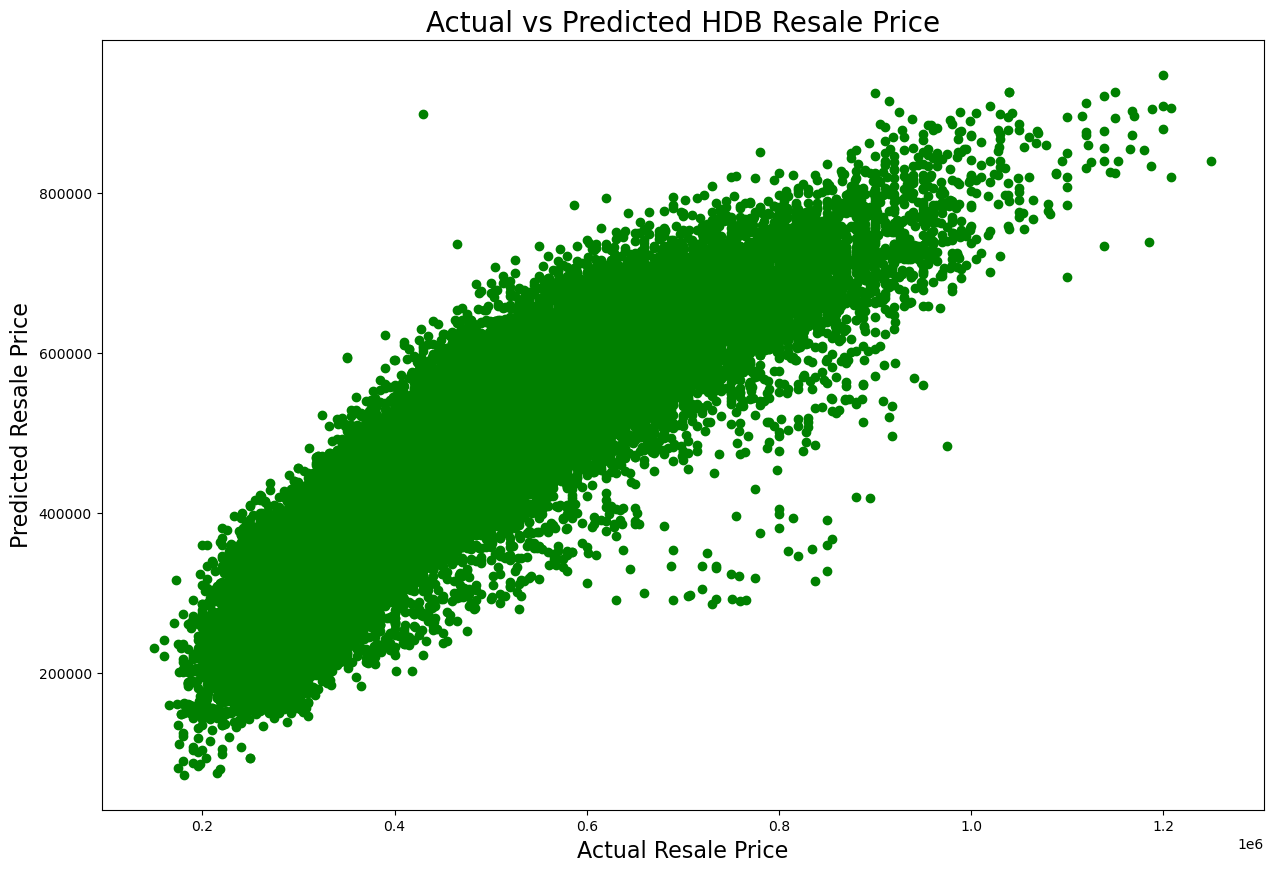

In [47]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_prediction, color="green")
plt.xlabel("Actual Resale Price", fontsize=16)
plt.ylabel("Predicted Resale Price", fontsize=16)
plt.title("Actual vs Predicted HDB Resale Price", fontsize=20)

In [48]:
results = pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_prediction,"Difference":y_test-y_prediction})
results

,Actual Value,Predicted Value,Difference
150502,715888.0,655058.159848,60829.840152
96127,528000.0,498622.685964,29377.314036
59124,335000.0,322786.253000,12213.747000
161230,670000.0,732782.755782,-62782.755782
118249,650000.0,665138.462352,-15138.462352
...,...,...,...
110421,698000.0,730349.708417,-32349.708417
96628,560000.0,563729.171891,-3729.171891
35656,275000.0,232619.393576,42380.606424
147941,695000.0,554803.109731,140196.890269


<font size="5">Feature Importance</font>

In [49]:
# Retrieve coefficients (importance) of features and feature names
importance = model.coef_
features = X.columns

# Create a DataFrame to store feature names and their corresponding importance scores
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})

# Display the DataFrame
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
1,Flat Type,33879.183304
7,School Dist (km),17142.896781
8,storey_mean,5605.047978
4,Floor Area (sqm),2861.254916
0,Flat Model,1144.804146
9,Months Since Sold,95.023780
2,Town,-1594.894313
10,Years Since Leased,-4769.970545
5,Hawker Dist (km),-26036.417000
6,MRT Dist (km),-56221.125930


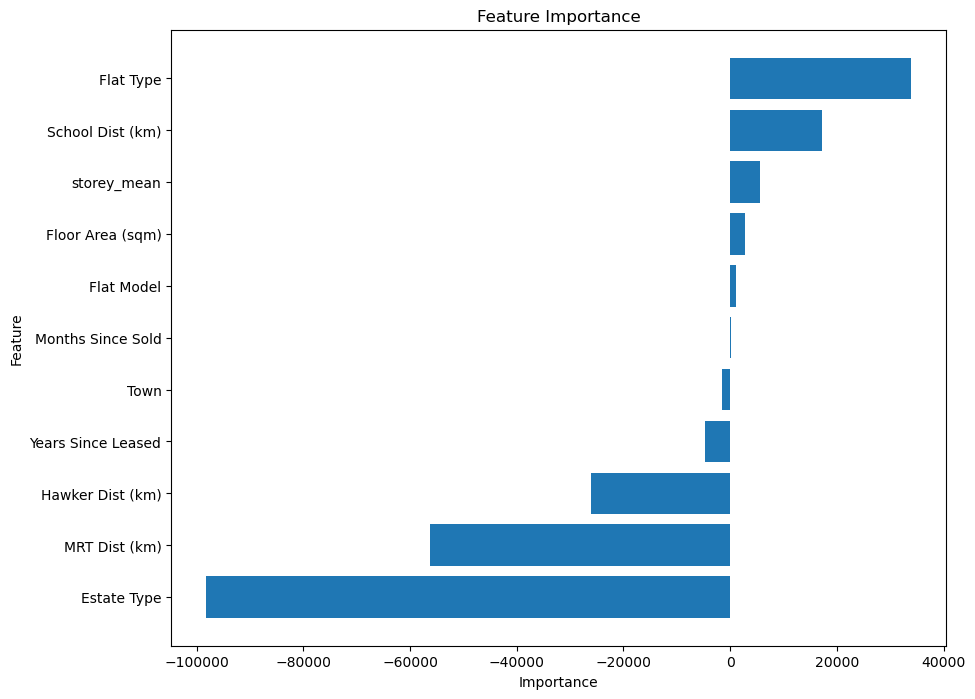

In [50]:
import matplotlib.pyplot as plt

# Reverse the order of the DataFrame
feature_importance_df_reversed = feature_importance_df[::-1]

plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df_reversed['Feature'], feature_importance_df_reversed['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.savefig("Feature Importance")
plt.show()

As shown above, flat type is the most important feature in helping the regression model to predict the resale flat prices, followed by distance to the school and so on. Conversely, the estate type is the least important feature in helping the regression model to predict the resale flat prices. Nonetheless, this could also be due to the lack of the data type (only Mature and Non-Mature) in building predictive power.